In [48]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [49]:
from sklearn.datasets import load_iris

In [50]:
def name_for_target(target):
    num = len(iris.target_names)
    if target < num:
        return iris.target_names[target]
    else:
        return np.nan

In [65]:
iris = load_iris()
columns = ['l1', 'l2' ,  'l3', 'l4']
df = pd.DataFrame(data = iris.data, columns = columns)
# df['label'] = iris.target
df['name'] = list(map(name_for_target, iris.target)) 
df.head()

,l1,l2,l3,l4,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 单变量分析

## 直方图

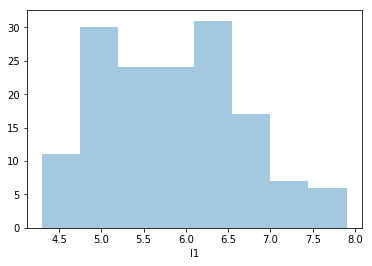

In [52]:
sns.distplot(df.l1, kde=False)

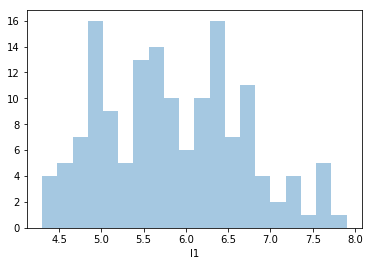

In [53]:
# 分成20份

sns.distplot(df.l1, bins = 20, kde=False)

# 两个变量

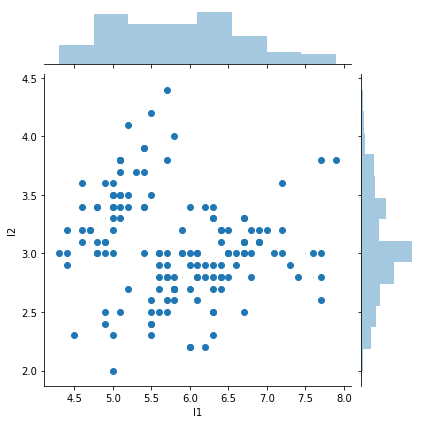

In [54]:
sns.jointplot(x="l1", y="l2", data=df)

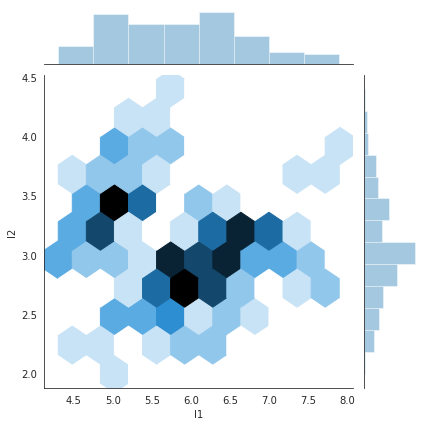

In [55]:
with sns.axes_style("white"): 
    sns.jointplot(x="l1", y="l2", kind = 'hex',data=df)

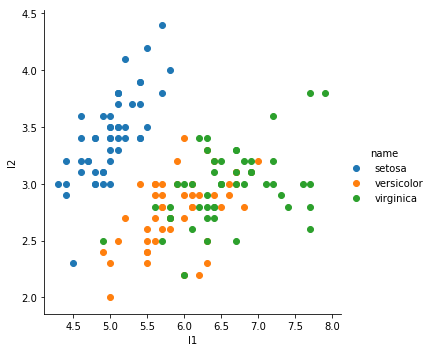

In [56]:
# 我们将使用seaborn的FacetGrid来为散点图上色
sns.FacetGrid(df, hue = 'name', height = 5.0).map(plt.scatter, 'l1', 'l2').add_legend()

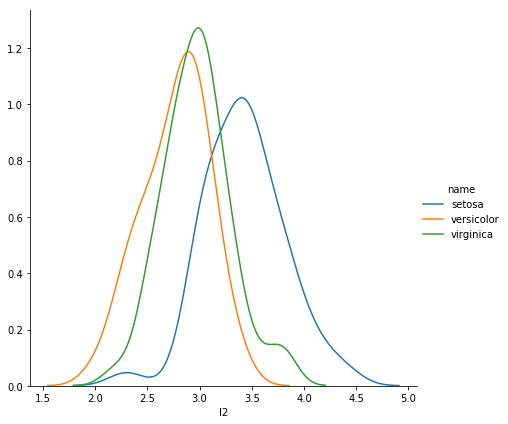

In [57]:
# 最后一个用于研究单变量关系的seaborn plot是kdeplot，它创建并可视化了底层特性的内核密度估计
sns.FacetGrid(df, hue="name", height=6) \
   .map(sns.kdeplot, "l2") \
   .add_legend()

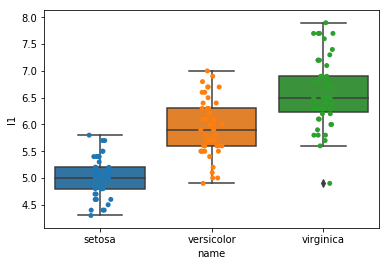

In [58]:
# 我们可以通过用seaborn的striplot添加单独的点来扩展上图
# 
# 我们将使用jitter=True,这样所有的点都不会落在物种的单条垂直线上
#
# 每次将产生的轴作为ax，每次都会导致结果图显示在前面的axes上
ax = sns.boxplot(x="name",  y="l1", data=df)
ax = sns.stripplot(x="name", y="l1", data=df, jitter=True, edgecolor="gray")

## 变量之间的两两关系

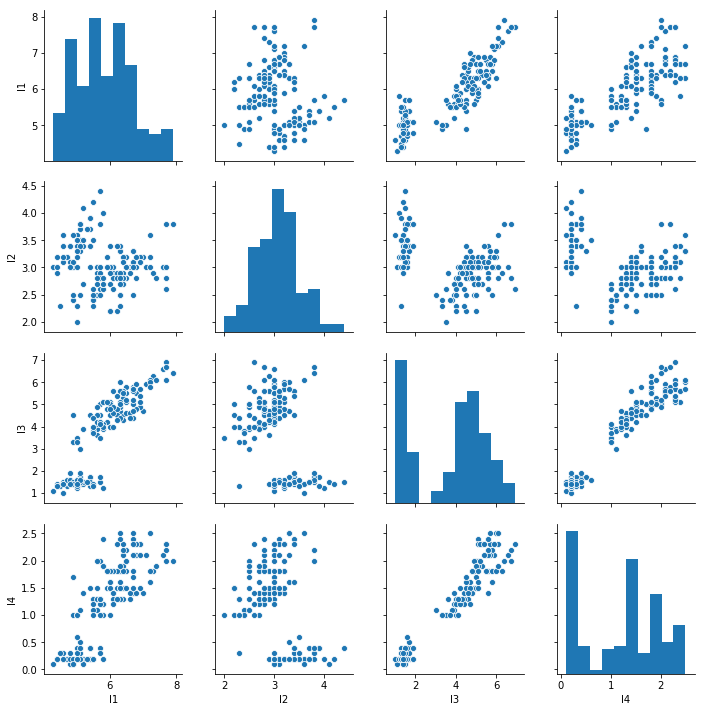

In [59]:
sns.pairplot(df[['l1', 'l2', 'l3', 'l4']])

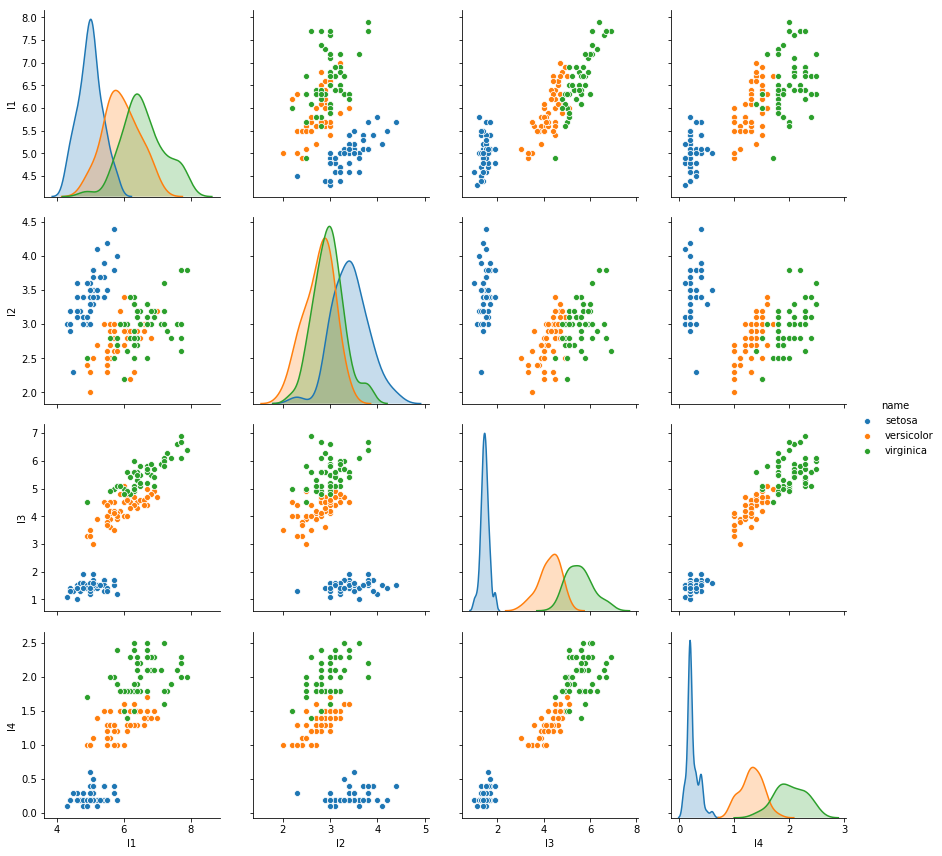

In [64]:
# 另一个有用的seaborn plot是pairplot，它显示了每一对特征之间的双变量关系
# 从pairplot中，我们可以看到Iris-setosa物种在所有特征组合中与另外两种都是分离的
sns.pairplot(df[['l1', 'l2', 'l3', 'l4', 'name']], hue="name", height=3, diag_kind = 'kde')

## 回归

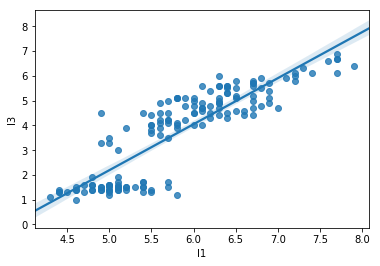

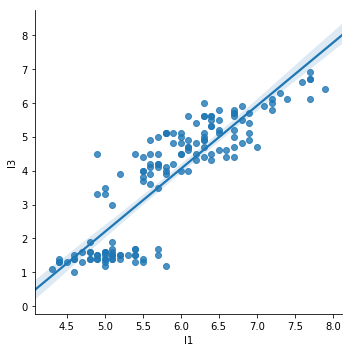

In [15]:
sns.regplot(x="l1", y = "l3", data=df)
sns.lmplot(x="l1", y = "l3", data = df)

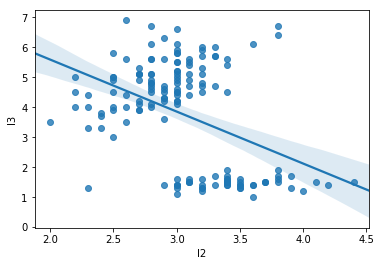

In [16]:
sns.regplot(x="l2", y = "l3", data=df)

# 多变量分析

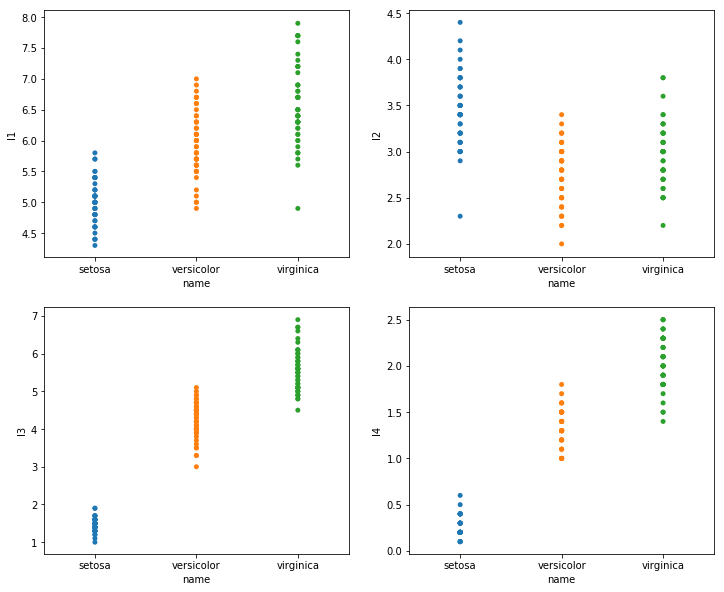

In [24]:
plt.figure(figsize = (12, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
sns.stripplot(x="name", y="l1", data=df, jitter=False, ax = ax1)
sns.stripplot(x="name", y="l2", data=df, jitter=False, ax = ax2)
sns.stripplot(x="name", y="l3", data=df, jitter=False, ax = ax3)
sns.stripplot(x="name", y="l4", data=df, jitter=False, ax = ax4)

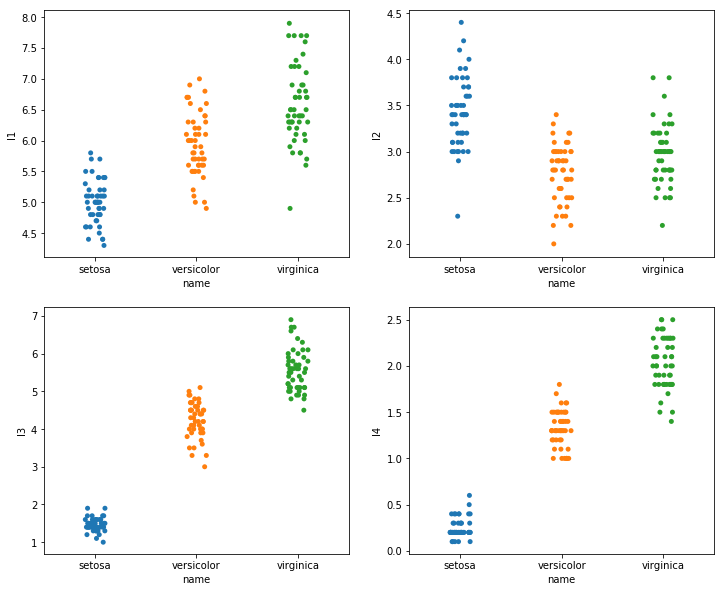

In [25]:
plt.figure(figsize = (12, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
sns.stripplot(x="name", y="l1", data=df, jitter=True, ax = ax1)
sns.stripplot(x="name", y="l2", data=df, jitter=True, ax = ax2)
sns.stripplot(x="name", y="l3", data=df, jitter=True, ax = ax3)
sns.stripplot(x="name", y="l4", data=df, jitter=True, ax = ax4)

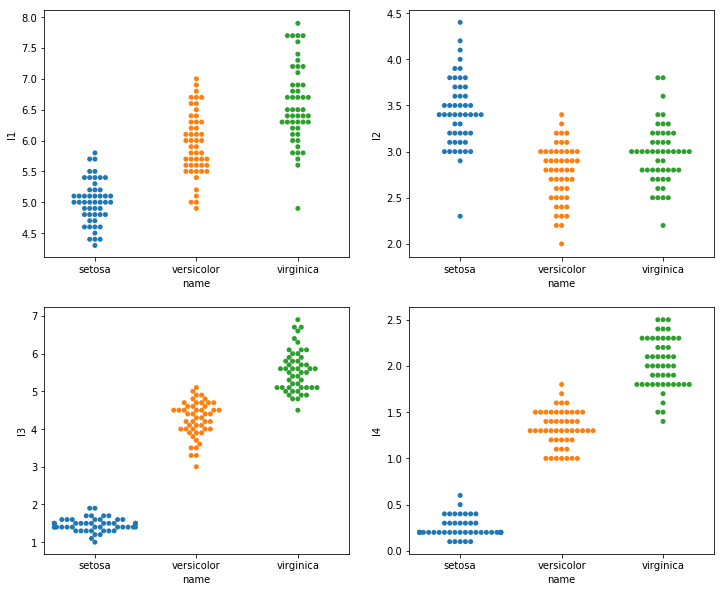

In [32]:
plt.figure(figsize = (12, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
sns.swarmplot(x="name", y="l1", data=df, ax = ax1)
sns.swarmplot(x="name", y="l2", data=df, ax = ax2)
sns.swarmplot(x="name", y="l3", data=df, ax = ax3)
sns.swarmplot(x="name", y="l4", data=df, ax = ax4)

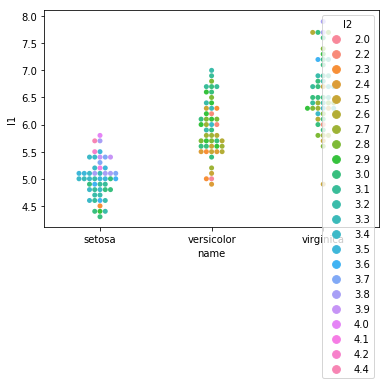

In [39]:
sns.swarmplot(x="name", y="l1", hue="l2", data=df) 
# plt.show()

## 盒图
- IQR即统计学概念四分位距离，第四分之一位与第四分之三位之间的距离
- N=1.5IQR如果一个值>Q3+N或 < Q1-N 则为高离群

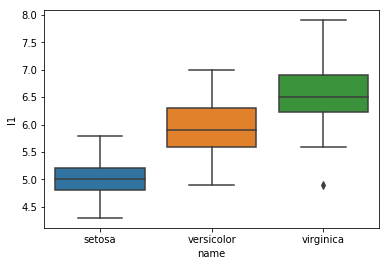

In [41]:
sns.boxplot(x="name", y = "l1", data=df)

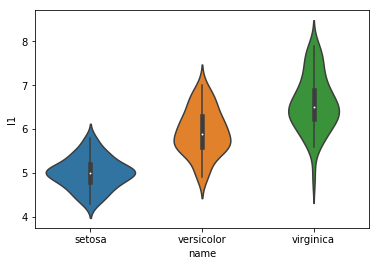

In [42]:
sns.violinplot(x="name", y = "l1", data=df)